In [1]:
#
# Project Task 1 
#


import pandas as pd

# Import the datasets
restaurants_df = pd.read_csv('resturants.csv')
items_df = pd.read_csv('items.csv')
sales_df = pd.read_csv('sales.csv')

# Display the first few rows of each dataset to confirm loading
print("Restaurants Data:")
print(restaurants_df.head())

print("\nItems Data:")
print(items_df.head())

print("\nSales Data:")
print(sales_df.head())

Restaurants Data:
   id            name
0   1     Bob's Diner
1   2  Beachfront Bar
2   3     Sweet Shack
3   4        Fou Cher
4   5     Corner Cafe

Items Data:
   id  store_id                               name  kcal   cost
0   1         4                     Chocolate Cake   554   6.71
1   2         4  Breaded Fish with Vegetables Meal   772  15.09
2   3         1                  Sweet Fruity Cake   931  29.22
3   4         1    Amazing Steak Dinner with Rolls   763  26.42
4   5         5                          Milk Cake   583   6.07

Sales Data:
         date  item_id  price  item_count
0  2019-01-01        3  29.22         2.0
1  2019-01-01        4  26.42        22.0
2  2019-01-01       12   4.87         7.0
3  2019-01-01       13   4.18        12.0
4  2019-01-01       16   3.21       136.0


In [2]:
# Check the shape and structure of each dataset
print("Shape of Restaurants Data:", restaurants_df.shape)
print("Shape of Items Data:", items_df.shape)
print("Shape of Sales Data:", sales_df.shape)

# Information about the structure of each dataset
print("\nRestaurants Data Info:")
print(restaurants_df.info())

print("\nItems Data Info:")
print(items_df.info())

print("\nSales Data Info:")
print(sales_df.info())

# Check for missing values in each dataset
print("\nMissing Values in Restaurants Data:")
print(restaurants_df.isnull().sum())

print("\nMissing Values in Items Data:")
print(items_df.isnull().sum())

print("\nMissing Values in Sales Data:")
print(sales_df.isnull().sum())

# Check for any outliers in the sales data (you can use describe for numerical columns)
print("\nSales Data Summary:")
print(sales_df.describe())


Shape of Restaurants Data: (6, 2)
Shape of Items Data: (100, 5)
Shape of Sales Data: (109600, 4)

Restaurants Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      6 non-null      int64 
 1   name    6 non-null      object
dtypes: int64(1), object(1)
memory usage: 224.0+ bytes
None

Items Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        100 non-null    int64  
 1   store_id  100 non-null    int64  
 2   name      100 non-null    object 
 3   kcal      100 non-null    int64  
 4   cost      100 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 4.0+ KB
None

Sales Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109600 entries, 0 to 109599
Data columns (tota

In [3]:
print("Sales Data Columns:", sales_df.columns)
print("Items Data Columns:", items_df.columns)
print("Restaurants Data Columns:", restaurants_df.columns)


# Rename 'id' to 'item_id' in items_df
items_df.rename(columns={'id': 'item_id'}, inplace=True)

# Merge sales with items data
sales_items_df = pd.merge(sales_df, items_df, on='item_id', how='left')

restaurants_df.rename(columns={'id': 'store_id', 'name': 'restaurant_name'}, inplace=True)

# Merge the resulting data with restaurants data
final_df = pd.merge(sales_items_df, restaurants_df, on='store_id', how='left')

# Display the final merged dataset
print("Final Merged Dataset:")
print(final_df.head())
print("Restaurants Data Columns:", final_df.columns)


Sales Data Columns: Index(['date', 'item_id', 'price', 'item_count'], dtype='object')
Items Data Columns: Index(['id', 'store_id', 'name', 'kcal', 'cost'], dtype='object')
Restaurants Data Columns: Index(['id', 'name'], dtype='object')
Final Merged Dataset:
         date  item_id  price  item_count  store_id  \
0  2019-01-01        3  29.22         2.0         1   
1  2019-01-01        4  26.42        22.0         1   
2  2019-01-01       12   4.87         7.0         1   
3  2019-01-01       13   4.18        12.0         1   
4  2019-01-01       16   3.21       136.0         1   

                              name  kcal   cost restaurant_name  
0                Sweet Fruity Cake   931  29.22     Bob's Diner  
1  Amazing Steak Dinner with Rolls   763  26.42     Bob's Diner  
2             Fantastic Sweet Cola   478   4.87     Bob's Diner  
3          Sweet Frozen Soft Drink   490   4.18     Bob's Diner  
4             Frozen Milky Smoothy   284   3.21     Bob's Diner  
Restaurants Dat

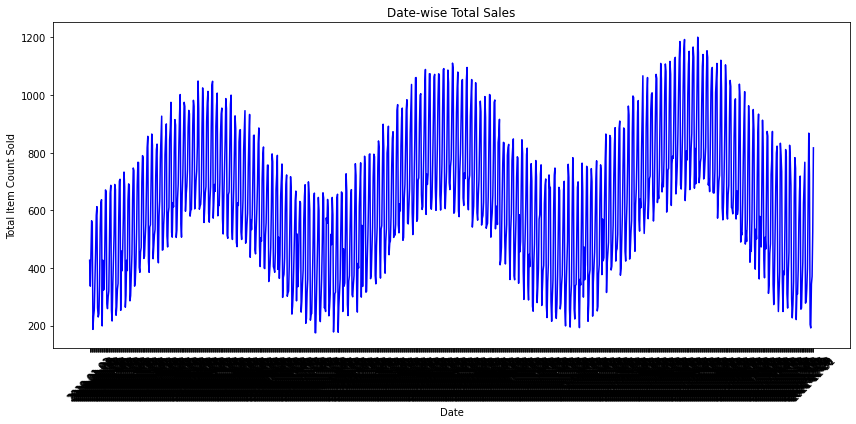

In [4]:
#
# Project Task 2: EDA
#

import matplotlib.pyplot as plt
import seaborn as sns

# Group by date and sum the item_count (sales)
date_wise_sales = final_df.groupby('date')['item_count'].sum().reset_index()

# Plot the sales trend over time
plt.figure(figsize=(12,6))
plt.plot(date_wise_sales['date'], date_wise_sales['item_count'], color='blue')
plt.title('Date-wise Total Sales')
plt.xlabel('Date')
plt.ylabel('Total Item Count Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

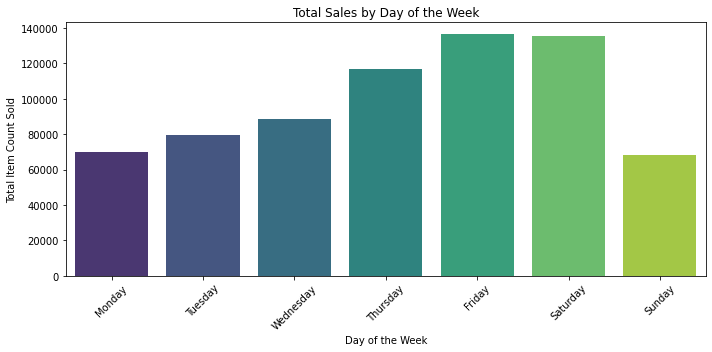

In [5]:
# Convert 'date' to datetime if not already done
final_df['date'] = pd.to_datetime(final_df['date'])

# Extract day of the week from 'date' (Monday = 0, Sunday = 6)
final_df['day_of_week'] = final_df['date'].dt.dayofweek

# Group by day of the week and calculate total sales
sales_by_day = final_df.groupby('day_of_week')['item_count'].sum().reset_index()

# Map day numbers to names
day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
sales_by_day['day_of_week'] = sales_by_day['day_of_week'].map(day_map)

# Plot sales by day of the week
plt.figure(figsize=(10,5))
sns.barplot(x='day_of_week', y='item_count', data=sales_by_day, palette='viridis')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Item Count Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

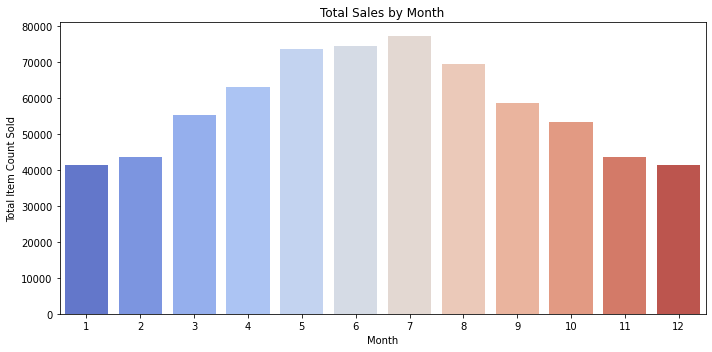

In [6]:
# Extract month from the 'date' column
final_df['month'] = final_df['date'].dt.month

# Group by month and calculate total sales
sales_by_month = final_df.groupby('month')['item_count'].sum().reset_index()

# Plot sales by month
plt.figure(figsize=(10,5))
sns.barplot(x='month', y='item_count', data=sales_by_month, palette='coolwarm')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Item Count Sold')
plt.tight_layout()
plt.show()

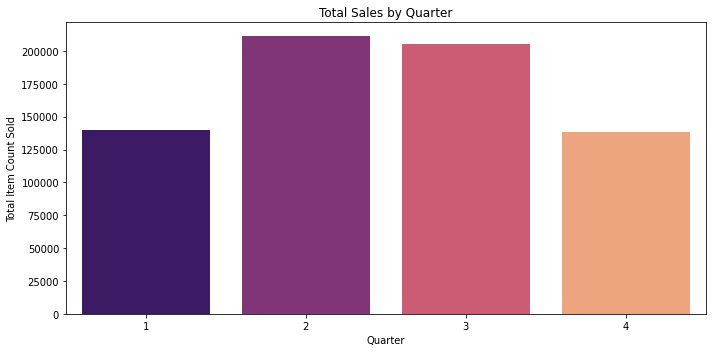

In [7]:
# Extract quarter from 'date' column
final_df['quarter'] = final_df['date'].dt.quarter

# Group by quarter and calculate total sales
sales_by_quarter = final_df.groupby('quarter')['item_count'].sum().reset_index()

# Plot sales by quarter
plt.figure(figsize=(10,5))
sns.barplot(x='quarter', y='item_count', data=sales_by_quarter, palette='magma')
plt.title('Total Sales by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Item Count Sold')
plt.tight_layout()
plt.show()

Restaurant with the most sales: Bob's Diner with 687527.0 items sold


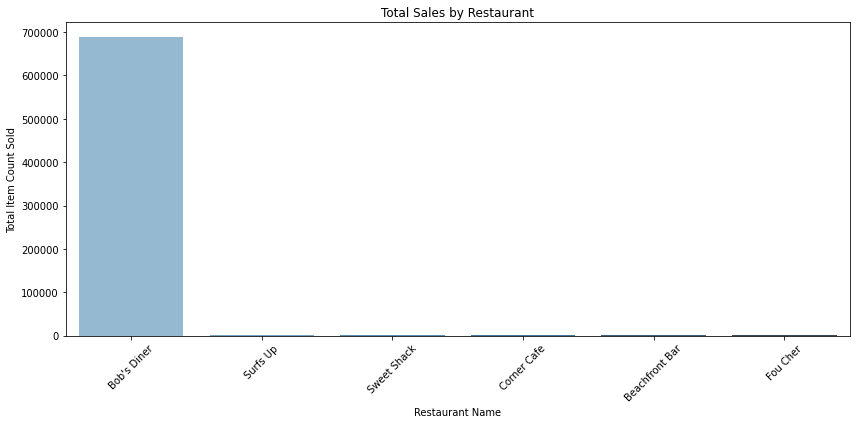

In [8]:
# Group by restaurant and sum the item count to find total sales per restaurant
sales_by_restaurant = final_df.groupby('restaurant_name')['item_count'].sum().reset_index()

# Find the restaurant with the most sales
top_restaurant = sales_by_restaurant.loc[sales_by_restaurant['item_count'].idxmax()]

print(f"Restaurant with the most sales: {top_restaurant['restaurant_name']} with {top_restaurant['item_count']} items sold")

# Plot the total sales for each restaurant
plt.figure(figsize=(12,6))
sns.barplot(x='restaurant_name', y='item_count', data=sales_by_restaurant.sort_values('item_count', ascending=False), palette='Blues_d')
plt.title('Total Sales by Restaurant')
plt.xlabel('Restaurant Name')
plt.ylabel('Total Item Count Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

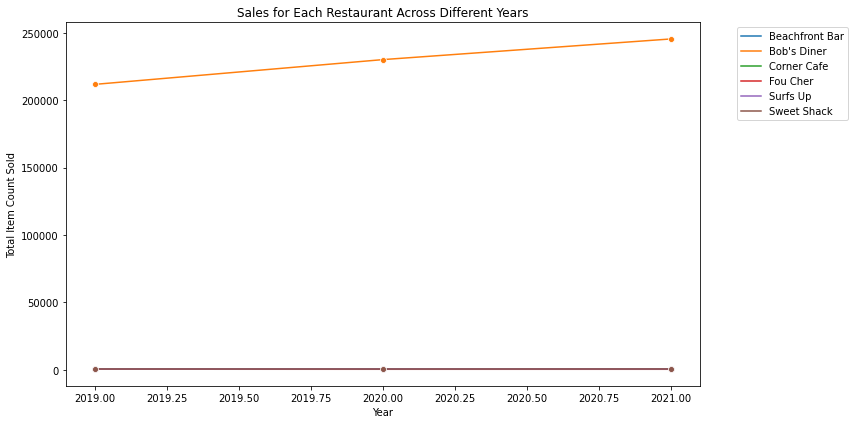

In [9]:
# Extract year from 'date'
final_df['year'] = final_df['date'].dt.year

# Group by restaurant and year
sales_by_restaurant_year = final_df.groupby(['restaurant_name', 'year'])['item_count'].sum().reset_index()

# Plot the sales by restaurant and year
plt.figure(figsize=(12,6))
sns.lineplot(x='year', y='item_count', hue='restaurant_name', data=sales_by_restaurant_year, marker='o')
plt.title('Sales for Each Restaurant Across Different Years')
plt.xlabel('Year')
plt.ylabel('Total Item Count Sold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

                               name  item_count
85               Strawberry Smoothy    236337.0
46             Frozen Milky Smoothy    103263.0
9                Amazing pork lunch     61043.0
64                    Mutton Dinner     52772.0
67                     Orange Juice     43874.0
22          Blue Ribbon Beef Entree     42774.0
4   Amazing Steak Dinner with Rolls     34439.0
88          Sweet Frozen Soft Drink     27490.0
83  Sea Bass with Vegetables Dinner     23839.0
90                  Sweet Lamb Cake     18764.0


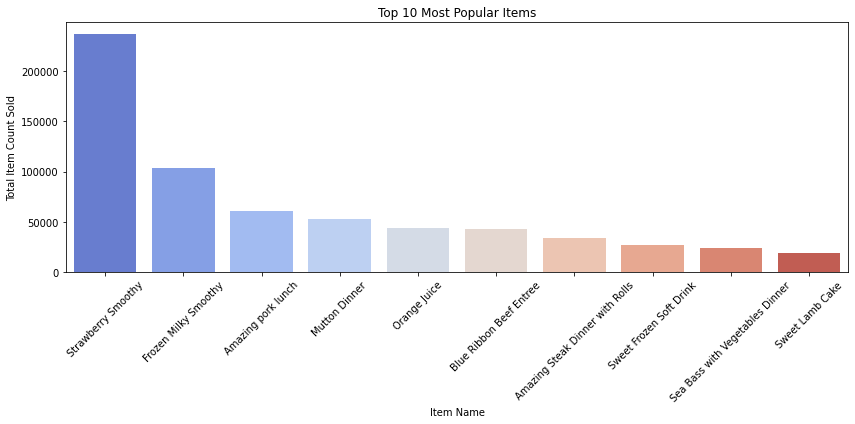

In [10]:
#
# Project Task 3
#

# Group by item name to find total sales for each item
popular_items = final_df.groupby('name')['item_count'].sum().reset_index()

# Sort by item_count to get the most popular items
popular_items = popular_items.sort_values(by='item_count', ascending=False)

# Display the top 10 most popular items
print(popular_items.head(10))

# Plot the top 10 most popular items
plt.figure(figsize=(12,6))
sns.barplot(x='name', y='item_count', data=popular_items.head(10), palette='coolwarm')
plt.title('Top 10 Most Popular Items')
plt.xlabel('Item Name')
plt.ylabel('Total Item Count Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [11]:
# Get the most popular item
most_popular_item = popular_items.iloc[0]['name']

# Filter for rows where this item is sold
popular_item_stores = final_df[final_df['name'] == most_popular_item]

# Group by store to find which stores sold the most of this item
popular_item_by_store = popular_item_stores.groupby('restaurant_name')['item_count'].sum().reset_index()

# Sort and display the top stores selling the most popular item
print(popular_item_by_store.sort_values(by='item_count', ascending=False))


  restaurant_name  item_count
0     Bob's Diner    236337.0


In [12]:
# Group by store and item to find the most popular item in each store
popular_item_per_store = final_df.groupby(['restaurant_name', 'name'])['item_count'].sum().reset_index()

# Find the most popular item for each store by sorting within each group
most_popular_item_per_store = popular_item_per_store.sort_values(['restaurant_name', 'item_count'], ascending=[True, False]).drop_duplicates('restaurant_name')

print(most_popular_item_per_store)

   restaurant_name                           name  item_count
1   Beachfront Bar        Fantastic Milky Smoothy      1147.0
25     Bob's Diner             Strawberry Smoothy    236337.0
40     Corner Cafe           Frozen Milky Smoothy       273.0
57        Fou Cher  Blue Ribbon Fruity Vegi Lunch       298.0
85        Surfs Up             Awesome Soft Drink       997.0
92     Sweet Shack                Awesome Smoothy      1692.0


In [13]:
# Group by restaurant and sum the total item count
sales_volume_by_store = final_df.groupby('restaurant_name')['item_count'].sum().reset_index()

# Find the store with the highest sales volume
highest_sales_store = sales_volume_by_store.loc[sales_volume_by_store['item_count'].idxmax()]
print(f"Store with the highest sales volume: {highest_sales_store['restaurant_name']} with {highest_sales_store['item_count']} items sold")

Store with the highest sales volume: Bob's Diner with 687527.0 items sold


In [14]:
# Calculate total revenue for each row
final_df['revenue'] = final_df['item_count'] * final_df['price']

# Group by store and date to calculate daily revenue
daily_revenue_by_store = final_df.groupby(['restaurant_name', 'date'])['revenue'].sum().reset_index()

# Group by store to find average daily revenue
average_daily_revenue = daily_revenue_by_store.groupby('restaurant_name')['revenue'].mean().reset_index()

# Sort by revenue to find the store with the highest average daily revenue
top_revenue_store = average_daily_revenue.loc[average_daily_revenue['revenue'].idxmax()]
print(f"Store with the highest daily revenue: {top_revenue_store['restaurant_name']} with an average revenue of {top_revenue_store['revenue']} per day")

# Compare the top revenue store with the top sales volume store
if highest_sales_store['restaurant_name'] == top_revenue_store['restaurant_name']:
    print(f"The store with the highest sales volume is also making the most money per day: {highest_sales_store['restaurant_name']}")
else:
    print(f"The store with the highest sales volume ({highest_sales_store['restaurant_name']}) is not the same as the one making the most money per day ({top_revenue_store['restaurant_name']})")

Store with the highest daily revenue: Bob's Diner with an average revenue of 5782.185848540146 per day
The store with the highest sales volume is also making the most money per day: Bob's Diner


In [15]:
# Group by restaurant and item to find the price for each item
item_prices = final_df.groupby(['restaurant_name', 'name', 'kcal'])['price'].max().reset_index()

# Sort by price within each restaurant and get the most expensive item
most_expensive_item_per_store = item_prices.sort_values(['restaurant_name', 'price'], ascending=[True, False]).drop_duplicates('restaurant_name')

# Display the most expensive item along with its calorie count for each store
print(most_expensive_item_per_store[['restaurant_name', 'name', 'price', 'kcal']])

   restaurant_name                           name  price  kcal
5   Beachfront Bar          Sweet Vegi Soft Drink   5.70   538
28     Bob's Diner              Sweet Fruity Cake  29.22   931
52     Corner Cafe                     Pike Lunch  26.37   653
57        Fou Cher  Blue Ribbon Fruity Vegi Lunch  53.98   881
91        Surfs Up                     Steak Meal  26.21   607
93     Sweet Shack  Blue Ribbon Frozen Milky Cake   7.70   636


In [16]:
#
# Project Task 3 : ML
#

# Assuming 'final_df' contains the merged dataset with the relevant columns
final_df['date'] = pd.to_datetime(final_df['date'])

# Feature engineering
final_df['day_of_week'] = final_df['date'].dt.dayofweek
final_df['month'] = final_df['date'].dt.month
final_df['quarter'] = final_df['date'].dt.quarter
final_df['year'] = final_df['date'].dt.year
final_df['day_of_month'] = final_df['date'].dt.day


In [17]:
# Create a target variable (total sales)
target = final_df.groupby('date')['item_count'].sum().reset_index()

print("target shape:", target.shape)
print("target dtypes:", target.dtypes)


# Split into train and test sets
train_data = target[target['date'] < (target['date'].max() - pd.DateOffset(years=1))]
test_data = target[target['date'] >= (target['date'].max() - pd.DateOffset(years=1))]



# Print the shapes of train_data and test_data
print("train_data shape:", train_data.shape)
print("test_data shape:", test_data.shape)

# Check the data types
print("train_data dtypes:", train_data.dtypes)
print("test_data dtypes:", test_data.dtypes)


# Feature set
X_train = train_data.drop(columns=['date'], errors='ignore')
y_train = train_data.drop(columns=['item_count'], errors='ignore')


X_test = test_data.drop(columns=['date'], errors='ignore')
y_test = test_data.drop(columns=['item_count'],errors='ignore')


X_train = X_train.astype(float)  # Convert all columns to float if there are mixed types
X_test = X_test.astype(float)

# Check the shape of X_train and y_train
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# Check the data types
print("y_train dtypes:", y_train.dtypes)
print("y_test dtypes:", y_test.dtypes)




target shape: (1096, 2)
target dtypes: date          datetime64[ns]
item_count           float64
dtype: object
train_data shape: (730, 2)
test_data shape: (366, 2)
train_data dtypes: date          datetime64[ns]
item_count           float64
dtype: object
test_data dtypes: date          datetime64[ns]
item_count           float64
dtype: object
X_train shape: (730, 1)
X_test shape: (366, 1)
y_train dtypes: date    datetime64[ns]
dtype: object
y_test dtypes: date    datetime64[ns]
dtype: object


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np



# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42)

}

#    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
#    'XGBoost': XGBRegressor(n_estimators=100, random_state=42)

# Dictionary to store RMSE values
rmse_values = {}

# Train models and calculate RMSE
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_values[model_name] = rmse
    print(f"{model_name} RMSE: {rmse}")

# Display RMSE values for comparison
print("RMSE Values for all models:", rmse_values)


UFuncTypeError: ufunc 'subtract' cannot use operands with types dtype('<M8[ns]') and dtype('float64')

In [ ]:
# Find the best model based on RMSE
best_model_name = min(rmse_values, key=rmse_values.get)
best_model = models[best_model_name]

# Prepare the data for forecasting the next year
future_dates = pd.date_range(start=target['date'].max() + pd.DateOffset(days=1), periods=365)
future_df = pd.DataFrame(future_dates, columns=['date'])

# Generate features for future data
future_df['day_of_week'] = future_df['date'].dt.dayofweek
future_df['month'] = future_df['date'].dt.month
future_df['quarter'] = future_df['date'].dt.quarter
future_df['year'] = future_df['date'].dt.year
future_df['day_of_month'] = future_df['date'].dt.day

# Make predictions for the next year
future_predictions = best_model.predict(future_df.drop(columns=['date']))

# Combine future dates with predictions
forecast_df = pd.DataFrame({
    'date': future_df['date'],
    'predicted_sales': future_predictions
})

# Display the forecasted sales
print(forecast_df)
